ステータス最大ポケモン： アルセウス
ステータス最小ポケモン： ヨワシ


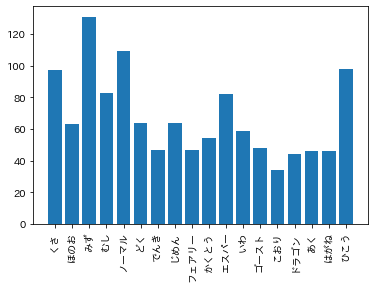

In [20]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# 定数
COLUMN_NAME_NO = '図鑑番号'
COLUMN_NAME_POKEMON_NAME = 'ポケモン名'
COLUMN_NAME_POKEMON_TYPE_1 = 'タイプ１'
COLUMN_NAME_POKEMON_TYPE_2 = 'タイプ２'
COLUMN_NAME_POKEMON_TOTAL = '合計'

def read_pokemon_status_list(file_path):
    with open(file_path) as f:
        reader = csv.DictReader(f)
        status_list = [row for row in reader]
    return status_list

def get_pokemon_status_list_without_megasinka(pokemon_status_list):
    return [pokemon_status for pokemon_status in pokemon_status_list if not '-' in pokemon_status[COLUMN_NAME_NO]]

def get_max_status_pokemon(pokemon_status_list):
    pokemon_status_list_filterd = [status for status in pokemon_status_list if status[COLUMN_NAME_POKEMON_TOTAL] != '']
    return max(pokemon_status_list_filterd, key=lambda pokemon_status: int(pokemon_status[COLUMN_NAME_POKEMON_TOTAL]))

def get_min_status_pokemon(pokemon_status_list):
    pokemon_status_list_filterd = [status for status in pokemon_status_list if status[COLUMN_NAME_POKEMON_TOTAL] != '']
    return min(pokemon_status_list_filterd, key=lambda pokemon_status: int(pokemon_status[COLUMN_NAME_POKEMON_TOTAL]))

def get_type_count_dict(pokemon_status_list):
    pokemon_type_dict = {}
    for pokemon_status in pokemon_status_list_without_megasinka:
        if pokemon_status[COLUMN_NAME_POKEMON_TYPE_1] == '':
            continue
        if not pokemon_status[COLUMN_NAME_POKEMON_TYPE_1] in pokemon_type_dict:
            pokemon_type_dict[pokemon_status[COLUMN_NAME_POKEMON_TYPE_1]] = 0

        pokemon_type_dict[pokemon_status[COLUMN_NAME_POKEMON_TYPE_1]] += 1

    for pokemon_status in pokemon_status_list_without_megasinka:
        if pokemon_status[COLUMN_NAME_POKEMON_TYPE_2] == '':
            continue
        if not pokemon_status[COLUMN_NAME_POKEMON_TYPE_2] in pokemon_type_dict:
            pokemon_type_dict[pokemon_status[COLUMN_NAME_POKEMON_TYPE_2]] = 0
    
        pokemon_type_dict[pokemon_status[COLUMN_NAME_POKEMON_TYPE_2]] += 1
    
    return pokemon_type_dict

# CSV読込
pokemon_status_list = read_pokemon_status_list('../dataset/pokemon_status.csv')
pokemon_status_list_without_megasinka = get_pokemon_status_list_without_megasinka(pokemon_status_list)

# ステータス最大ポケモン表示
max_status_pokemon = get_max_status_pokemon(pokemon_status_list_without_megasinka)
print(f'ステータス最大ポケモン： {max_status_pokemon[COLUMN_NAME_POKEMON_NAME]}')

# ステータス最小ポケモン表示
min_status_pokemon = get_min_status_pokemon(pokemon_status_list_without_megasinka)
print(f'ステータス最小ポケモン： {min_status_pokemon[COLUMN_NAME_POKEMON_NAME]}')

# タイプ数のグラフ表示
type_count_dict = get_type_count_dict(pokemon_status_list_without_megasinka)

plt.rcParams['font.family'] = 'IPAexGothic'
names = list(type_count_dict.keys())
values = list(type_count_dict.values())

plt.bar(range(len(type_count_dict)),values,tick_label=names)

plt.xticks(rotation=90)
plt.show()